<ipython-input-1-f4e3c3cb5552>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


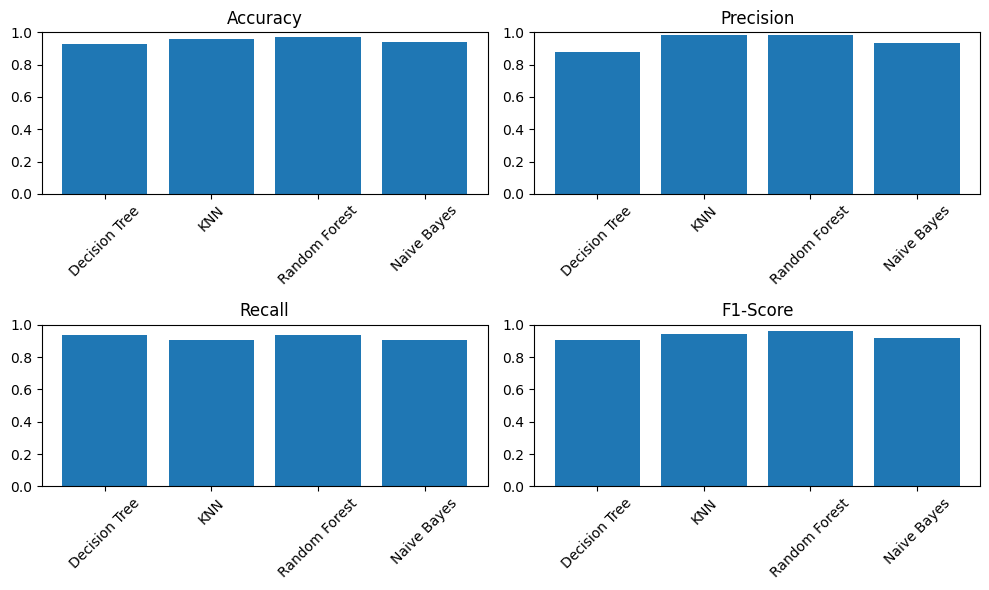

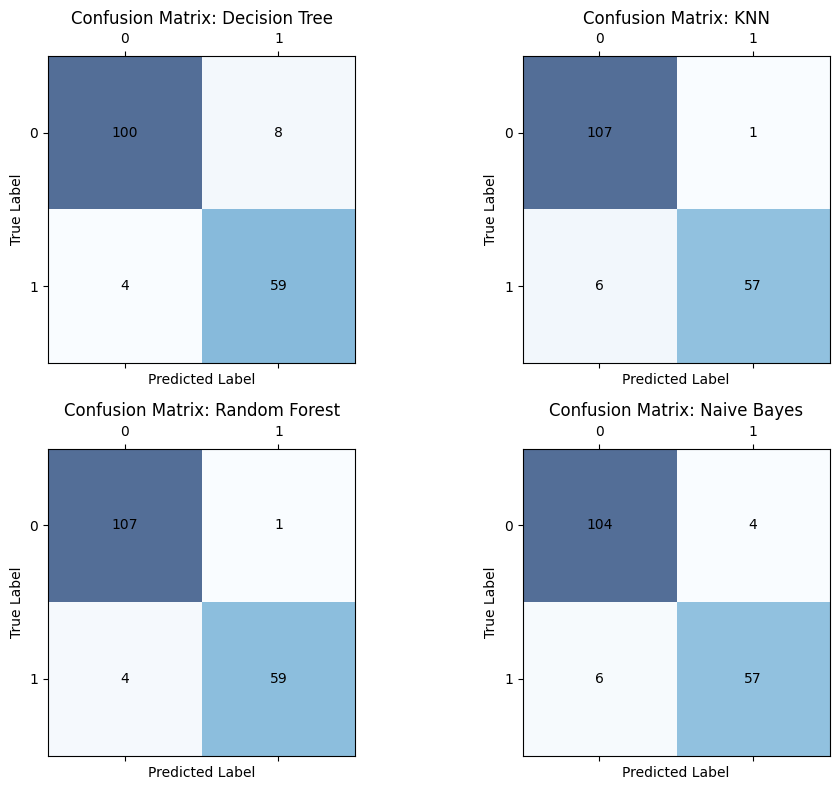

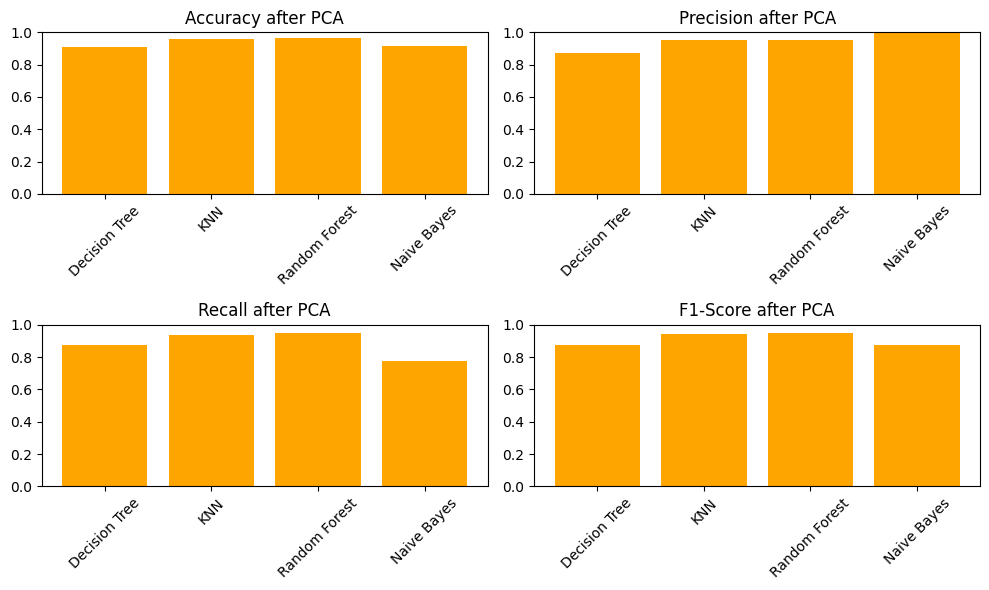

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA

# Load dataset
file_path = 'data (2).csv'
data = pd.read_csv(file_path)

# Drop unnecessary columns
data = data.drop(columns=['id', 'Unnamed: 32'])

# Map target values to binary (M = 1, B = 0)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Split dataset into features and target
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Models to evaluate
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

# Dictionary to store the results
results = {}
confusion_matrices = {}

# Train, predict and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

    # Store confusion matrix
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)

# Plot bar chart for model performance
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
n_metrics = len(metrics)
n_models = len(models)

plt.figure(figsize=(10, 6))

for idx, metric in enumerate(metrics):
    plt.subplot(2, 2, idx+1)
    scores = [results[model][metric] for model in models]
    plt.bar(models.keys(), scores)
    plt.title(metric)
    plt.ylim(0, 1)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for idx, (name, cm) in enumerate(confusion_matrices.items()):
    ax = axes[idx // 2, idx % 2]
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.7)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
    ax.set_title(f'Confusion Matrix: {name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.tight_layout()
plt.show()

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Re-train models with PCA-applied data
pca_results = {}
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred_pca = model.predict(X_test_pca)

    # Calculate evaluation metrics after PCA
    accuracy = accuracy_score(y_test, y_pred_pca)
    precision = precision_score(y_test, y_pred_pca)
    recall = recall_score(y_test, y_pred_pca)
    f1 = f1_score(y_test, y_pred_pca)

    # Store PCA results
    pca_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# Plot bar chart for model performance after PCA
plt.figure(figsize=(10, 6))

for idx, metric in enumerate(metrics):
    plt.subplot(2, 2, idx+1)
    scores = [pca_results[model][metric] for model in models]
    plt.bar(models.keys(), scores, color='orange')
    plt.title(f'{metric} after PCA')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
